All links in this tutorial are copied from https://ctg.cncr.nl/software/summary_statistics
This commands are tested on Ubuntu and MacOS system, but not on Windows.
Note that you can manually download the data, instead of using 'os.system' calls in the following cell

In [5]:
import os

# download the data (execute this cell just once)
if not os.path.exists(f'sumstats/SavageJansen_2018_intelligence_metaanalysis.txt'):
    url = 'https://ctg.cncr.nl/documents/p1651/SavageJansen_IntMeta_sumstats.zip'
    os.system(f'wget {url}')
    os.system('unzip SavageJansen_IntMeta_sumstats.zip')

if not os.path.exists(f'Morningness_sumstats_Jansenetal.txt'):
    url = 'https://ctg.cncr.nl/documents/p1651/Morningness_sumstats_Jansenetal.txt.gz'
    os.system(f'wget {url}')
    os.system('gunzip Morningness_sumstats_Jansenetal.txt.gz')

In [6]:
import pandas as pd

# read in the data
cog = pd.read_csv('sumstats/SavageJansen_2018_intelligence_metaanalysis.txt', 
                  delim_whitespace=True,
                  usecols=['SNP', 'CHR', 'POS', 'A1', 'A2', 'stdBeta', 'SE', 'P'])

mor = pd.read_csv('Morningness_sumstats_Jansenetal.txt',
                  delim_whitespace=True,
                  usecols=['SNP', 'CHR', 'BP', 'A1', 'A2', 'OR', 'SE', 'P'])

mor.drop_duplicates('SNP', keep='first', inplace=True)

/var/folders/3g/mlb7sjlx22jggr6s86gh8p280000gn/T/ipykernel_2441/1476842149.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  mor = pd.read_csv('Morningness_sumstats_Jansenetal.txt',


In [9]:
print(len(cog), 'rows')
cog.head()

9295118 rows


,SNP,CHR,POS,A1,A2,stdBeta,SE,P
0,rs12184267,1,715265,t,c,0.006887,0.007519,0.3598
1,rs12184277,1,715367,a,g,-0.004914,0.007492,0.5116
2,rs12184279,1,717485,a,c,0.007912,0.007535,0.2938
3,rs116801199,1,720381,t,g,0.002217,0.007391,0.7644
4,rs12565286,1,721290,c,g,0.004174,0.007375,0.5711


In [10]:
print(len(mor), 'rows')
mor.head()

10857998 rows


,SNP,CHR,BP,A1,A2,OR,SE,P
0,rs12184267,1,715265,T,C,-0.000773,0.006405,0.9039
1,rs12184277,1,715367,G,A,-0.003762,0.006390,0.5560
2,rs12184279,1,717485,A,C,-0.003244,0.006390,0.6117
3,rs116801199,1,720381,T,G,-0.002460,0.006276,0.6952
4,rs12565286,1,721290,C,G,-0.001113,0.006298,0.8598


In [15]:
# show first genome-wide significant variant on chromosomes 1..5
cog[cog['P']<=5e-08].drop_duplicates('CHR', keep='first').head(5)

,SNP,CHR,POS,A1,A2,stdBeta,SE,P
71026,rs71638823,1,22374032,t,c,0.021719,0.003872,2.036000e-08
804577,rs7563013,2,23934087,a,g,-0.017043,0.003020,1.662000e-08
1574353,rs73139272,3,16858468,t,g,-0.024838,0.004057,9.235000e-10
2180661,rs12646225,4,696848,t,c,0.025128,0.004215,2.505000e-09
2890416,rs17826816,5,7519298,a,g,0.018375,0.003257,1.677000e-08


In [14]:
mor[mor['P']<=5e-08].drop_duplicates('CHR', keep='first').head(5)

,SNP,CHR,BP,A1,A2,OR,SE,P
27767,rs76626729,1,7744559,A,G,0.07929,0.014260,2.664000e-08
864695,rs12711951,2,4638414,T,C,0.01438,0.002546,1.627000e-08
1837186,rs13081924,3,14400077,T,C,-0.01897,0.003387,2.144000e-08
2832233,rs28634184,4,62873419,T,C,-0.01421,0.002587,3.966000e-08
3618634,rs9291813,5,63842133,T,C,-0.01462,0.002622,2.489000e-08


In [28]:
# show frst variant on each chromosome that is genome-wide significant for both traits
cog_mor = pd.merge(cog[cog['P']<=5e-08][['SNP', 'CHR', 'POS', 'A1', 'A2', 'stdBeta', 'P']],
                   mor[mor['P']<=5e-08][['SNP',               'A1', 'A2', 'OR', 'P']], 
                   on='SNP', how='inner', suffixes=('_COG', '_MOR'))
cog_mor.drop_duplicates('CHR', keep='first')

,SNP,CHR,POS,A1_COG,A2_COG,stdBeta,P_COG,A1_MOR,A2_MOR,OR,P_MOR
0,rs17824247,2,144152539,t,c,-0.018726,2.341000e-11,C,T,-0.01389,1.066000e-09
24,rs62380364,5,88107337,a,c,-0.017593,2.459000e-10,A,C,0.01356,2.064000e-09
45,rs10274077,7,133624271,t,c,-0.015904,4.751000e-08,T,C,0.01320,2.191000e-08
90,rs146951100,22,42386487,t,c,-0.028071,1.141000e-08,C,T,-0.02111,3.670000e-08


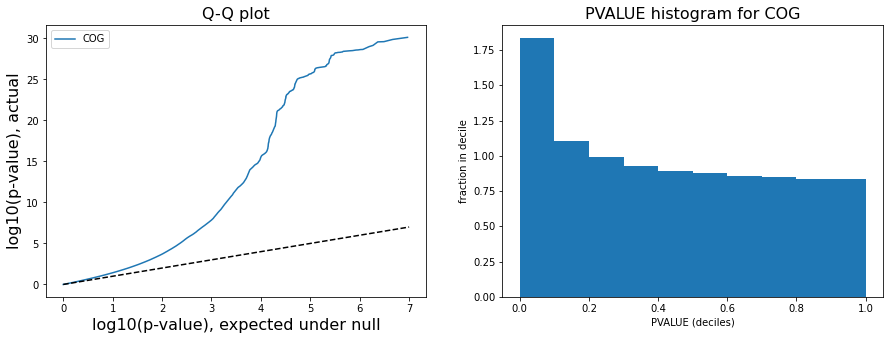

In [24]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5)); plt.subplot(1,2,1)
plt.plot(-np.log10(np.array(range(1,1+len(cog)))/len(cog)), 
         -np.log10(sorted(cog['P'].values)), label='COG')
plt.plot([0, 7], [0, 7], 'k--')
plt.title('Q-Q plot', fontsize=16);
plt.xlabel('log10(p-value), expected under null', fontsize=16);
plt.ylabel('log10(p-value), actual', fontsize=16);
plt.legend()

plt.subplot(1,2,2)
plt.hist(cog['P'].values, density=True);
plt.xlabel('PVALUE (deciles)')
plt.ylabel('fraction in decile')
plt.title('PVALUE histogram for COG', fontsize=16);